#importing 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from scipy import stats

In [7]:
from scipy.stats import pearsonr

##IMPORTING DATASET

In [8]:
file_path = r'C:\Users\Jane\Downloads\Weather Data.csv'

In [9]:
df = pd.read_csv(file_path)

In [10]:
print(df.head(10))

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   
5  1/1/2012 5:00    -1.4              -3.3         87                9   
6  1/1/2012 6:00    -1.5              -3.1         89                7   
7  1/1/2012 7:00    -1.4              -3.6         85                7   
8  1/1/2012 8:00    -1.4              -3.6         85                9   
9  1/1/2012 9:00    -1.3              -3.1         88               15   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  

#What are the key characteristics of the dataset? (e.g., number of records, features, data types)

In [11]:
print("Basic Information:")

Basic Information:


In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


#object data type indicates that it is likely stored as text (string)
-float64 means it is a numeric feature that allows for decimal values
-non-null count on each column indicates that that there are no missing values in this column.
-type int64 means it contains integer values
-n=8784 which is total number of entries

#Identify and handle any missing or null values. Describe your approach and reasoning.

In [13]:
missing_values = df.isnull().sum()

In [14]:
print("\nMissing Values per Feature:")


Missing Values per Feature:


In [15]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


##condition  applied (missing_values > 0) did not return any true values
indicating that there are no missing values in the dataset for the features  checked. 

##Check for and address any duplicate records using columns

In [16]:
duplicates = df[df.duplicated(subset=[
    'Date/Time',
    'Temp_C',
    'Dew Point Temp_C',
    'Rel Hum_%',
    'Wind Speed_km/h',
    'Visibility_km',
    'Press_kPa',
    'Weather'
])]

In [17]:
print("Duplicate Records Based on Specific Columns:")

Duplicate Records Based on Specific Columns:


In [18]:
print(duplicates)

Empty DataFrame
Columns: [Date/Time, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []


##there were no duplicates in the dataset

## Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.

In [19]:
summary = df.describe()

In [20]:
print(summary)

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


Outlier

◦ Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

##Creating a box plot

Temperature box plot

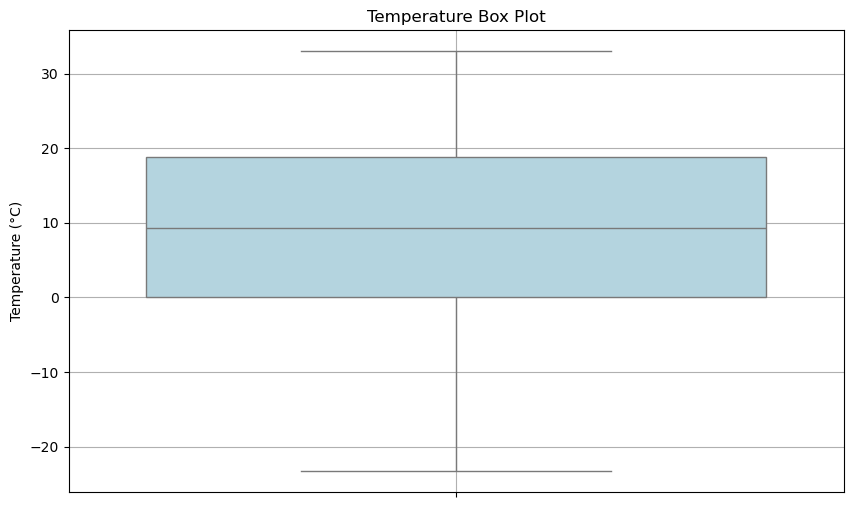

In [21]:
plt.figure(figsize=(10, 6)) #Creates a figure with a size of 10 inches by 6 inches.
sns.boxplot(y='Temp_C', data=df, color='lightblue') 
plt.title('Temperature Box Plot')
plt.ylabel('Temperature (°C)')
plt.grid(True)#Adds a grid to the plot for better readability.
plt.show()

From the box plot, the median temperature is about 9 °C, upper quartile is about 34 °C and the lower quartile temperature is about 15 °C. There are no observed outliers in the data.

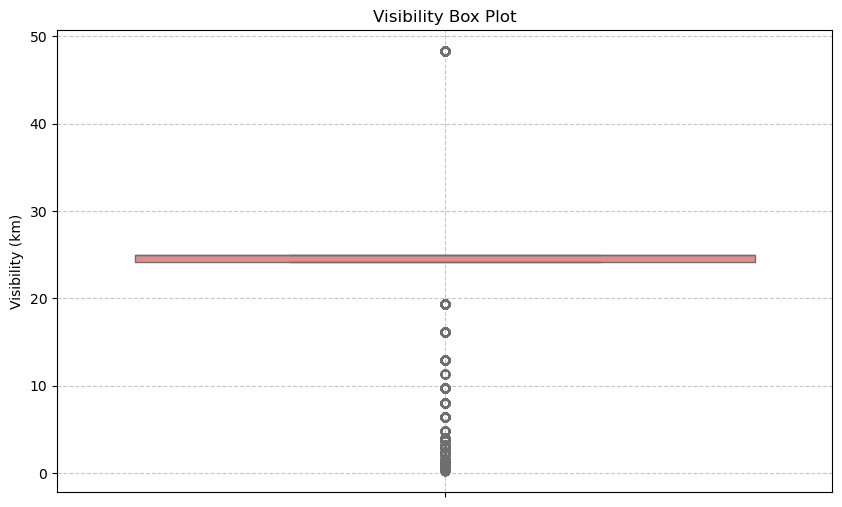

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Visibility_km', data=df, color='lightcoral')
plt.title('Visibility Box Plot')
plt.ylabel('Visibility (km)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The box plot indicates that the median, lower quartile, upper quartile values are closer to each other at around 25 km, the data however has a number of outliers below the lower quartile and one higher value above the upper quartile

##Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

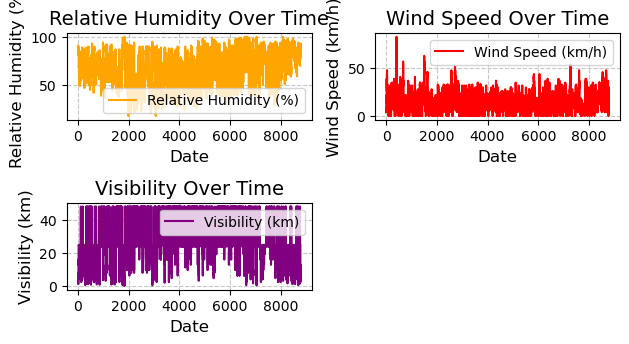

In [23]:

# Plot Relative Humidity
plt.subplot(3, 2, 1)
plt.plot(df.index, df['Rel Hum_%'], label='Relative Humidity (%)', color='orange')
plt.title('Relative Humidity Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Relative Humidity (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Plot Wind Speed
plt.subplot(3, 2, 2)
plt.plot(df.index, df['Wind Speed_km/h'], label='Wind Speed (km/h)', color='red')
plt.title('Wind Speed Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (km/h)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

## Plot Visibility
plt.subplot(3, 2, 3)
plt.plot(df.index, df['Visibility_km'], label='Visibility (km)', color='purple')
plt.title('Visibility Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Visibility (km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


The wind speed plot indicates a data with a trend, a daily cycle with peaks and troughs. Relative humidity data shows that the humidity is not dependant on time. The data doesnt show any time trend. 

##Create correlation matrices and heatmaps to identify relationships between different weather parameters.

In [24]:
columns_of_interest = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']


In [25]:
df_selected = df[columns_of_interest]

In [26]:
correlation_matrix = df_selected.corr(method='pearson')

<Axes: >

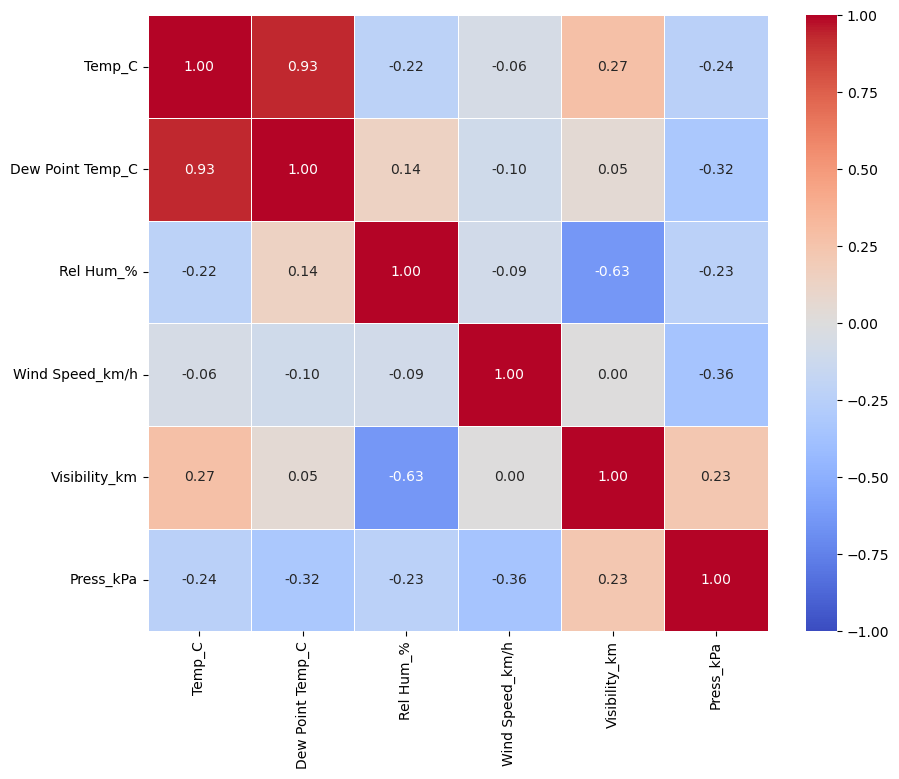

In [27]:
plt.figure(figsize=(10, 8))  #  size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)

4.Weather Patterns and Trends:
Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?s?

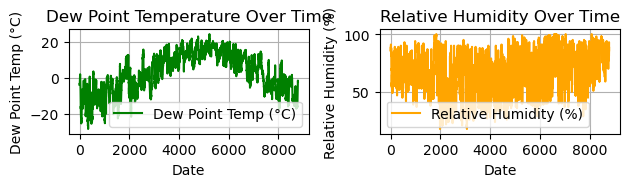

In [28]:


#plot for temperature
plt.subplot(3, 2,1 )
plt.plot(df.index, df['Dew Point Temp_C'], label='Dew Point Temp (°C)', color='green')
plt.title('Dew Point Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Dew Point Temp (°C)')
plt.grid(True)
plt.legend()

# Plot Relative Humidity
plt.subplot(3, 2,2 )
plt.plot(df.index, df['Rel Hum_%'], label='Relative Humidity (%)', color='orange')
plt.title('Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.legend()
# Adjust layout
plt.tight_layout()
plt.show()

The temperatuure plot shows that the temperatures rise and begin to fall after reaching an optimum level. The temperatures depict a clear trend. The humidity plot does not show a clear trend on whether humidity is time dependend.

Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

-Insights and Conclusions:
Summarize the key insights you have gained from your EDA.-Trends, patterns , correlation and descriptive statistics
-What are the most interesting or surprising findings?
The temperature shows a consistent upward and downward trend over the period


How can these insights be useful for weather prediction or other practical applications?
Strong correlations between variables like  humidity and visibility can offer insights into how different weather parameters interact.